In [1]:
import graphlab
import numpy as np

In [2]:
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to santosh.chilkunda@gmail.com and will expire on July 20, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1484030086.log


In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names()
poly15_data['price'] = sales['price']

In [6]:
lin_model = graphlab.linear_regression.create(poly15_data, target='price', features=my_features, l2_penalty=1e-5, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.064367     | 2662555.733758     | 245656.462162 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [7]:
lin_model.coefficients

name,index,value,stderr
(intercept),None,167924.887498,nan
power_1,None,103.090854766,nan
power_2,None,0.134604670814,nan
power_3,None,-0.000129071438543,nan
power_4,None,5.18929212461e-08,nan
power_5,None,-7.77169792098e-12,nan
power_6,None,1.71145348923e-16,nan
power_7,None,4.51177695997e-20,nan
power_8,None,-4.78838676735e-25,nan
power_9,None,-2.33343548826e-28,nan


In [8]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

In [9]:
l2_small_penalty=1e5

In [10]:
set1_poly15_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features = set1_poly15_data.column_names()
set1_poly15_data['price'] = set_1['price']
model1 = graphlab.linear_regression.create(set1_poly15_data, target='price', features=my_features, l2_penalty=l2_small_penalty, validation_set=None, verbose=False)

In [11]:
set2_poly15_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features = set2_poly15_data.column_names()
set2_poly15_data['price'] = set_2['price']
model2 = graphlab.linear_regression.create(set2_poly15_data, target='price', features=my_features, l2_penalty=l2_small_penalty, validation_set=None, verbose=False)

In [12]:
set3_poly15_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features = set3_poly15_data.column_names()
set3_poly15_data['price'] = set_3['price']
model3 = graphlab.linear_regression.create(set3_poly15_data, target='price', features=my_features, l2_penalty=l2_small_penalty, validation_set=None, verbose=False)

In [13]:
set4_poly15_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features = set4_poly15_data.column_names()
set4_poly15_data['price'] = set_4['price']
model4 = graphlab.linear_regression.create(set4_poly15_data, target='price', features=my_features, l2_penalty=l2_small_penalty, validation_set=None, verbose=False)

In [14]:
model1.coefficients[1]

{'index': None, 'name': 'power_1', 'stderr': nan, 'value': 2.1589232072733386}

In [15]:
model2.coefficients[1]

{'index': None,
 'name': 'power_1',
 'stderr': 6817.382259607133,
 'value': 2.269364539056681}

In [16]:
model3.coefficients[1]

{'index': None,
 'name': 'power_1',
 'stderr': 1745.5517873064202,
 'value': 2.15448760599578}

In [17]:
model4.coefficients[1]

{'index': None,
 'name': 'power_1',
 'stderr': 3681.585779282029,
 'value': 2.2727522876820543}

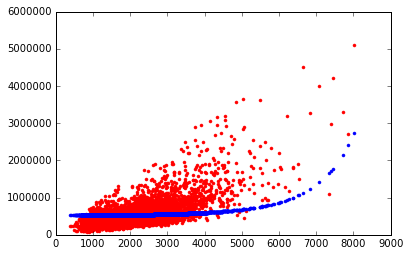

In [18]:
plt.plot(set1_poly15_data['power_1'], set1_poly15_data['price'],'r.', 
         set1_poly15_data['power_1'], model1.predict(set1_poly15_data),'.')

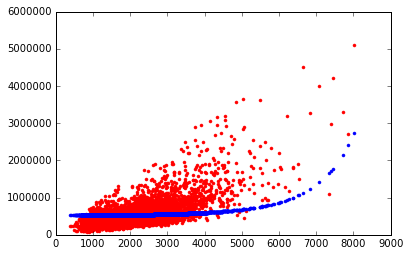

In [19]:
plt.plot(set1_poly15_data['power_1'], set1_poly15_data['price'],'r.', 
         set1_poly15_data['power_1'], model1.predict(set1_poly15_data),'.')

In [20]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [21]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
i = 3

start = (n*i)/k
end = (n*(i+1))/k-1    
validation3 = train_valid_shuffled[start:(end+1)]

first_set = train_valid_shuffled[0:start]
last_set = train_valid_shuffled[(end+1):n]
train4 = first_set.append(last_set)

In [22]:
len(validation3)

1940

In [23]:
len(train4)

17456

In [24]:
len(train_valid_shuffled)

19396

In [25]:
print int(round(train4['price'].mean(), 0))

539223


In [26]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    
    n = len(data)
    
    rss = np.zeros(k)
    
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1 
        
        validation_set = data[start:(end+1)]
        
        training_set_first = data[0:start]
        training_set_last = data[(end+1):n]
        training_set = training_set_first.append(training_set_last)
        
        lin_reg_model = graphlab.linear_regression.create(training_set, target=output_name, features=features_list, l2_penalty=l2_penalty, validation_set=None, verbose=False)
        
        error = (lin_reg_model.predict(validation_set) - validation_set[output_name])
        sq_error = error*error
        rss[i] = sq_error.sum()
    
    cv_rss = np.sum(rss)
    
    return (cv_rss)

In [27]:
l2_penalty_arr = np.logspace(1, 7, num=13)

In [28]:
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly15_data.column_names()
output_name = 'price'
poly15_data[output_name] = train_valid_shuffled[output_name]

k = 10

m = len(l2_penalty_arr)
cv_rss = np.zeros(m)

for j in xrange(m):
    cv_rss[j] = k_fold_cross_validation(k, l2_penalty_arr[j], poly15_data, output_name, my_features)
print np.argmin(cv_rss)

4


In [29]:
new_poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = new_poly15_data.column_names()
output_name = 'price'
new_poly15_data[output_name] = train_valid_shuffled[output_name]

model4 = graphlab.linear_regression.create(new_poly15_data, target=output_name, features=my_features, l2_penalty=l2_penalty_arr[4], validation_set=None, verbose=False)

In [30]:
new_test_data = polynomial_sframe(test['sqft_living'], 15)
new_test_data['price'] = test['price']

In [31]:
error = (model4.predict(new_test_data) - new_test_data['price'])
sq_error = error*error
test_rss = sq_error.sum()

print test_rss

1.38704957785e+14
